# Data Manipulation with Pandas
---

In [1]:
import pandas as pd

## Unit 1: Transforming Data
---

Pandas is build on top of Matplotlib and Numpy. The tabular data is one of the most famous and most often used form to represent data. In Pandas, we present such tabular data in the form of **DataFrame**. DataFrames are build on top of numpy arrays. Pandas is also used to plot simple charts using its plot API. This API is build on top of matplotlib. 

### Few Very common methods or attributes used on DataFrame to get a glimpse on the data are:
* `.values`
* `.columns`
* `.index`
* `.head()`
* `.tail()`
* `.describe()`

#### Sorting: 
There are various ways we can perform sorting on the DataFrame, Here are Few:
1. `df.sort_values("column_name")`
2. `df.sort_values("column_name", ascending=False)`
3. `df.sort_values(['column 1', 'column 2'])`
4. `df.sort_values(["column 1", "column 2"], ascending = [True, False])`

#### Subsetting:
There are various ways to subset the dataframe, it all depends on what you want.
1. You can zoom in on a particular column from a dataframe: `df['column_name']`
2. The same can be done to zoom on multiple columns: `df[['Column 1', 'column 2']]`
3. Specify conditional statements in square brakets `[ ]`.
    - `df[df['Column 1'] > 50]` **OR**
    - `df[df['Column 2'] == 'some text']` **OR**
    - For multiple conditional combination, we use `df[(CONDITION #1) & (CONDITION #2)]`
    - Also used to compare dates
4. If you want to filter on multiple values of categorical variable, we can use `.isin()`
    for eg. 
    > `is_black_or_brown = dogs["color"].isin(["Black", "Brown"])
   dogs[is_black_or_brown]`
   
### New Column
1. **Adding a New column:**<br>
Now this is simply a way to create a new column out of existing columns after performing some calculations on it (depend on use case)<br>
`df['new column'] = df['some_other_column'] / 100` OR some other calculation like this.
<br><br>
2. **Multiple Manipulation:**<br>
Pandas becomes really powerful, when it comes to handling multiple manipulation of data, filtering the results into something that is worth more than the original data. So, we seperate the big task into smaller chunks of tasks and then, using chaining on those tasks we can achieve the end result we wanted.<br>
`new_df = df[df[CONDITION]]`<br>
`new_df_2 = new_df.sort_values("column_name", ascending= False)`<br>
`new_df_2[["column 1", "column 2", "column 3"]]` (filtering the data to show)

## Unit 2: Aggregating Data
---

### Summary Statistics:
All these functions which helps in getting the values that provide some kind of summary of the data. Some of them are:
1. `.mean()`
2. `.median()`
3. `.mode()`
4. `.min()`
5. `.max()`
6. `.var()`
7. `.std()`
8. `.sum()`
9. `.quantile()` (getting the x% value of the total)

There is this `.agg()` that is used to apply custom functions on single, multi columns of the data and get summary statistics.
> `def pct30(column):
     return  column.quantile(0.3)
 df["column_name"].agg(pct30)`>
 
we can also get multiple summaries using `.agg()` function.
> create pct40 like pct30<br>
   `df["column_name"].agg([pct30, pct40])`
   
#### Cumulative Sum:
This is an intersting and really useful function in some cases. The values are added in a successive manner. First value is same, then second value is the sum of second and first value and so on. The last value is the sum of all the numbers (total sum).<br><br>
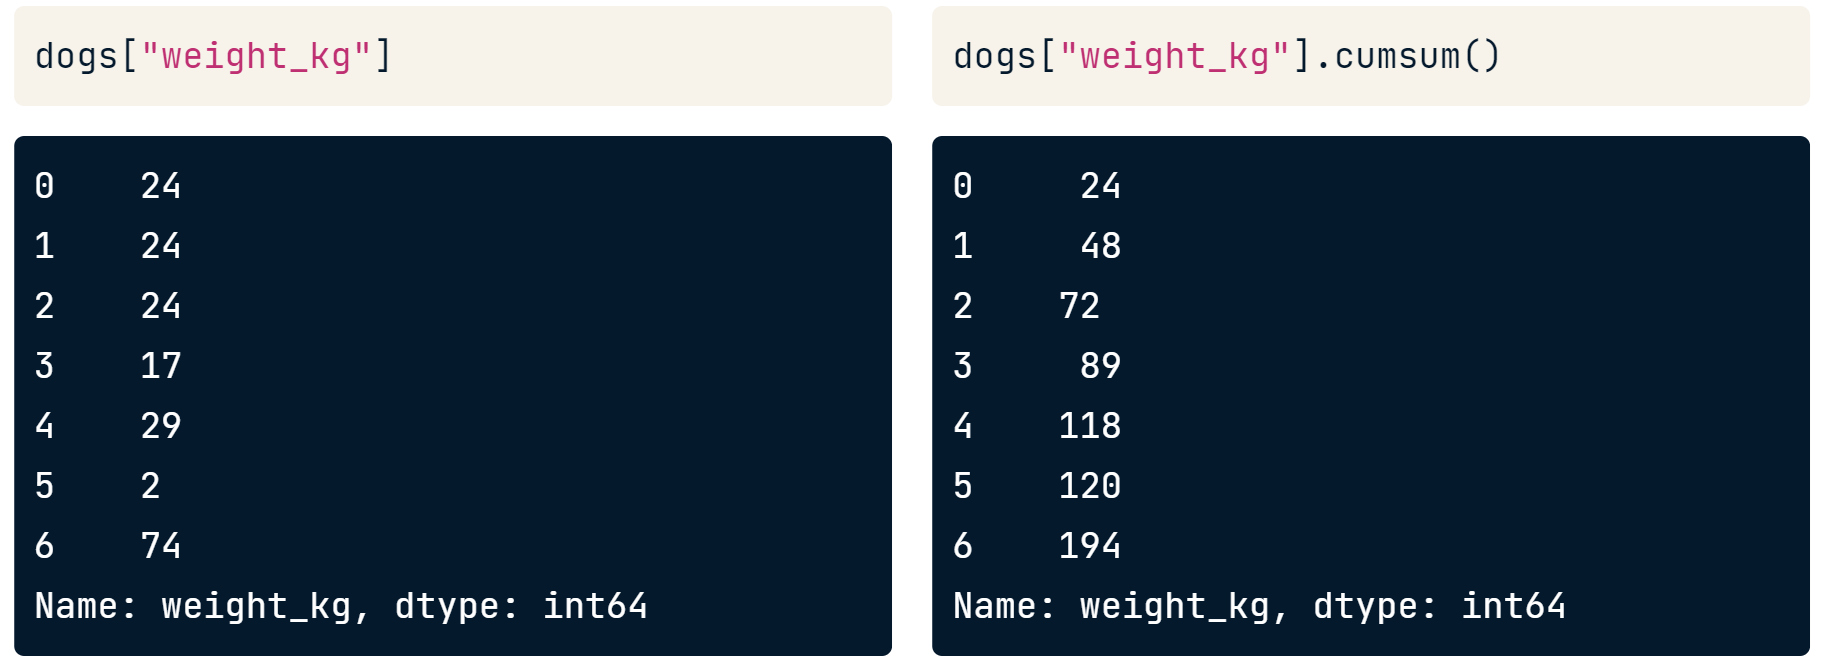
<br><br>
**Other cumulative functions available:** 
1. `.cummax()`
2. `.cummin()`
3. `.cumprod()`
---

**NOTE:** _"IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers._

---

### Counting:
We are often asked to count elements, their occurance and many other use cases. For eg, I have a dataset that deal with pet dogs and their appointment to the vet. Now each pet is given a name and breed as two seperate values in different columns.
So, Now if I wanna know how many dogs comes to the vet with respect to their breed. How will we do that, if there are multiply repeatation of some dogs in that dataset. Also two different breed of dogs can have same name.

**Let's see:**<br>
`df.drop_duplicates(subset = "name")` (this will just get us the unique entries related to unique names)<br><br>
But with this approach this is one point that we are missing and that is, same name but different breed.<br>
So, to solve that `df.drop_duplicates(subset=["name", "breed"])` (**Finally**, this will get us the unique breed of dogs and with unique names, therefore each dog is unique now).
> This method is not an _inplace_ function, so it returns the new dataframe

Therefore, `new_df = df.drop_duplicates(["name", "breed"])`
to count the number of occurance of each breed of dog:<br><br>
`new_df["breed"].value_counts()` (Normal count)<br>-------------->**OR**<br>`new_df["breed"].value_counts(sort=True)` (Sort the values inn descending order)<br>
------------------->**OR**<br>`new_df["breed"].value_counts(normalize=True)` (normalized values, values between 0 and 1)

---
### Grouped Summary Statistics:
Instead of writing code each time to get the mean for each value in a category, we can simply avoid this unnecessary repetative code through `.groupby()` method.
> `df_dogs.groupby("color")["weight_kg"].mean()`

**Multiple grouped summaries**<br>
> `df_dogs.groupby("color")["weight_kg"].agg([min, max, sum])`


#### Grouping by multiple variables
> `df_dogs.groupby(["color", "breed"])["weight_kg"].mean()` **OR**<br> `df_dogs.groupby(["color", "breed"])[["weight_kg", "height_cm"]].mean()`

#### Pivot Tables
Just like we did grouped summary statistics with `.groupby()`, we also have a powerfull tool in our arsenal: **pivot table**.
There are often used in spreedsheets for such summary statistics between different variables in the dataset.

Here we use different parameters to handle different working of these pivot tables:
* **values** : the column name you wanna find summary statistics of
* **index** : the column that you wanna group by to get their seperate values for summary statistics
* **aggfunc** : Default value is: **mean**. This is the name of the function that will be applied and required from the summary statistics.
* **columns** : the 2nd Dimensional value for the table, just like a grouping by multiple variables.
* **fill_value** :  replaces missing values with a real value (known as imputation)
* **margins** : (boolean value): shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents. This add an additional row and column, showing summary statistics for that particular row and column as whole and the intersection of these last row and last column (ALL), gives the statistical value of the function applied on the whole table (all the values in the table)

For eg:
> `df_dogs.pivot_table(values='weight_kg', index='color', aggfunc = np.median, columns='breed', fill_value = 0, margins=True)`

## Unit 3: Slicing and Indexing
---

### Explicit Indexes
---
**Setting a column as the Index:** `df.set_index("column_name")`<br>
**Reseting the Index:** `df.reset_index()  OR  df.reset_index(drop=True)`

Indexing make subsetting easier:<br>
[img](attachment:image-3.png)
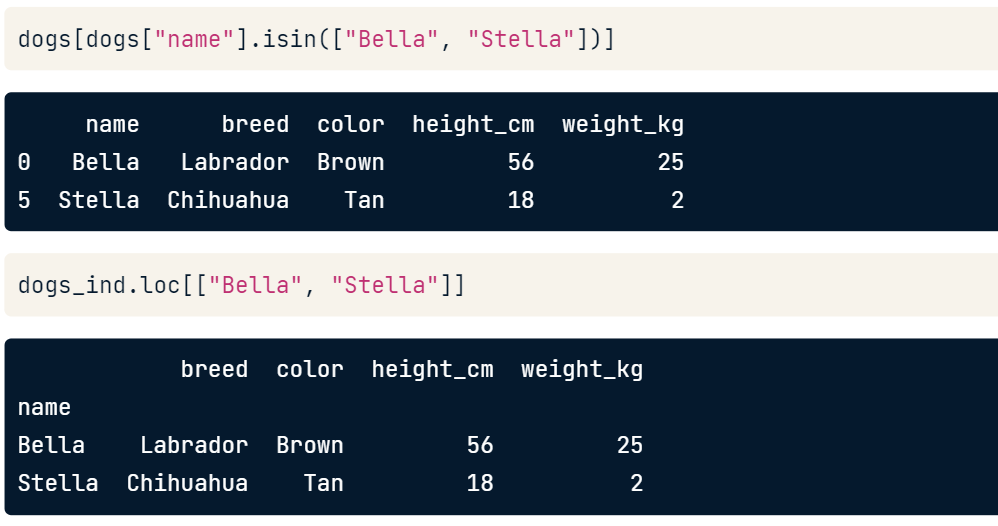

---
**Values in the Index don't Need to be UNIQUE**

---
We can also create multilevel / heirachical indexes by selection multiple columns in the `set_index()`<br>
And if you wanna subset such an multi-level index dataframe *from the outer Level*, we can do so by using **list**:<br>`df.loc[["index 1.1", "index 1.2"]]`<br>
But if we wanna subset the *inner level* of the dataframe, we can use a list of tuples:<br>
`df.loc[[("index 1.1","index 2.1"), ("index 1.2", "index 2.2")]]`

**Sort by index values**:
1. `df.sort_index()`
2. `df.sort_index(level=["column 1", "column 2"], ascending=[True, False])`

**Two problems we face:**
* index values are just data, so it become sometimes to work on them as same as the others.
* Indexes violate **tidy data** principles.
* So, you need to learn two syntaxes

### Slicing and Subsetting with .loc and .iloc
---

**NOTE: SORT the index before you slice**
> `df.set_index(["column 1", "column 2"]).sort_index()`

But **UNLIKE** slicing operation in Python, While using **.loc**, we use text based query to slice from the index. AND *final value* is **INCLUDED** Only works on outer level INDEX.<br>
[img](attachment:image-4.png)
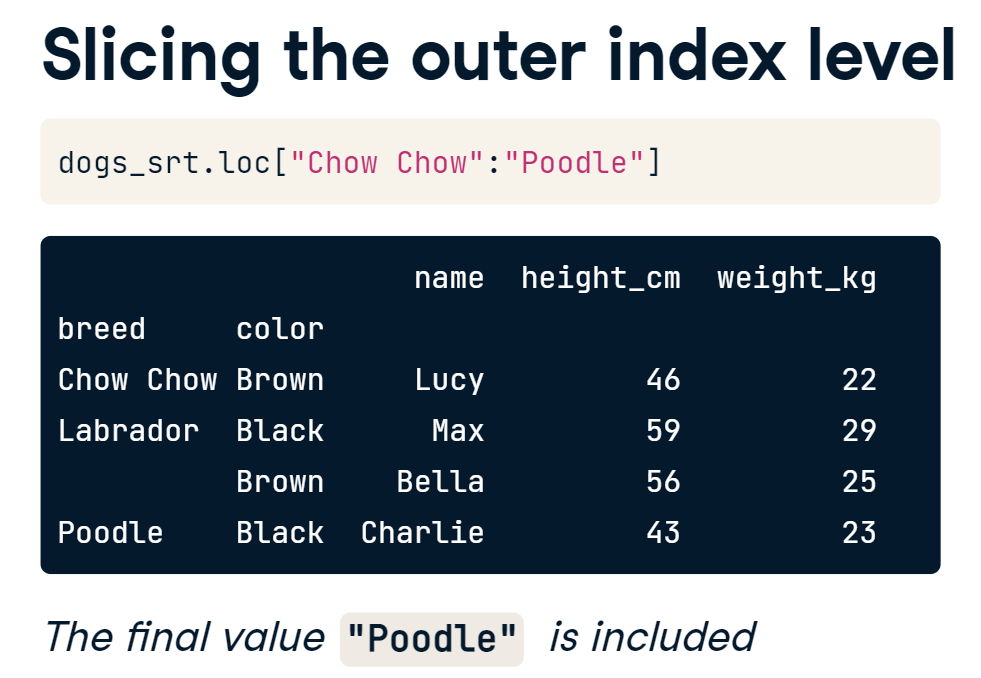

This same `.loc` functionality doesn't work on **inner indexes**

**You can also slice columns with this functionality:**
[img](attachment:image-5.png)
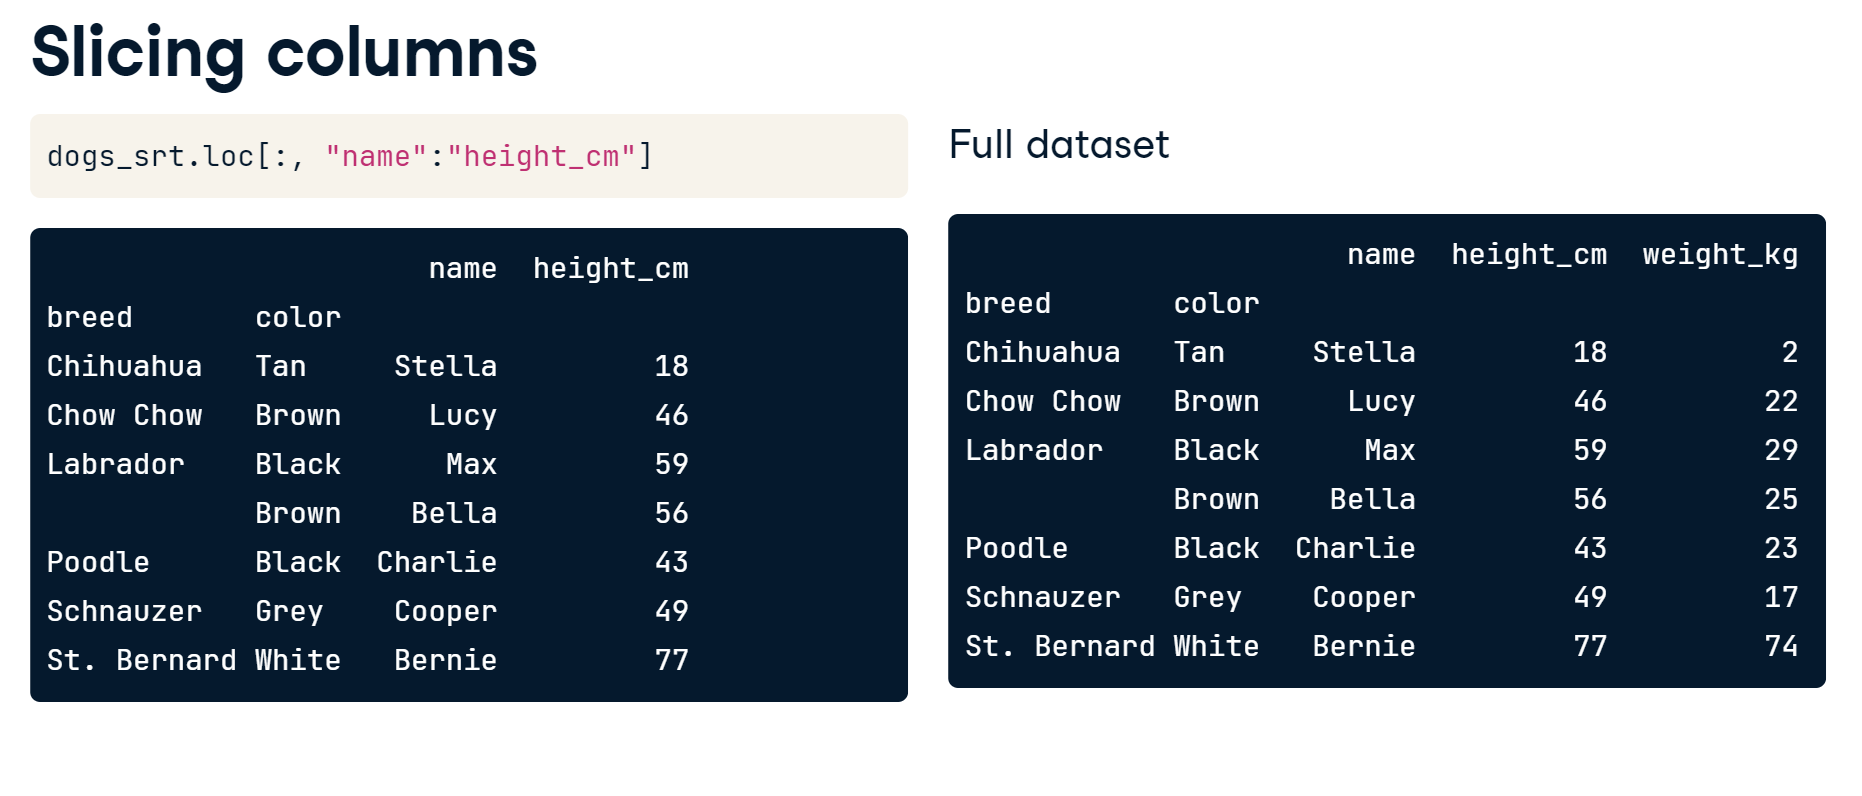

We can slice rows and columns at the same time, ALSO, if we wanna slice the inner index layer, we need to use tuples to mention both the outer as well as inner lindex layer and then slice it.
[img](attachment:image-6.png)
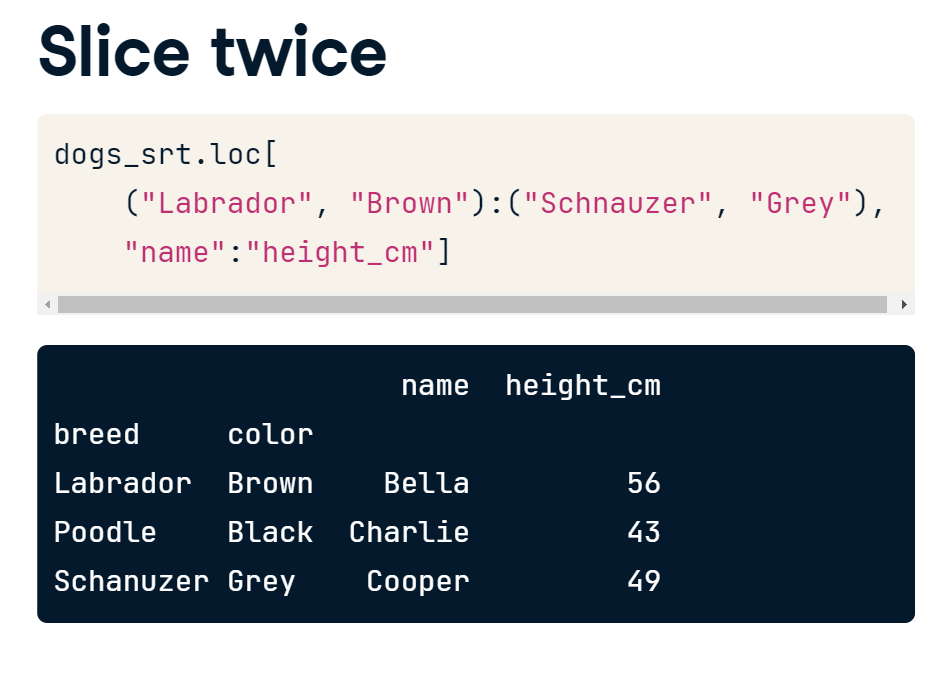

**NOTE: Slicing by partial dates is also available for us to use**

---

For numeric index based slicing we use `.iloc()`, and Here the end point is not included just like in python.

### Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use `.loc[]` to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, `yyyy-mm-dd`.

**NOTE :** Note that because the date isn't set as an index, a condition that contains only a year, such as `df["date"] == "2009"`, will check if the date is equal to the first day of the first month of the year (e.g. `2009-01-01`), rather than checking whether the date occurs within the given year. 

You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

For eg:
```
    # Use Boolean conditions to subset temperatures for rows in 2010 and 2011
    temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
    print(temperatures_bool)

    # Set date as an index and sort the index
    temperatures_ind = temperatures.set_index("date").sort_index()

    # Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
    print(temperatures_ind.loc["2010":"2011"])

    # Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
    print(temperatures_ind.loc["2010-08": "2011-02"])
```

### Slicing in Pivot table

*Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.*

`pivot_tb.loc["index_start":"index_end"]`

The **Axis** Argument:

`pivot_tb.mean(axis="index")` (across rows)

`pivot_tb.mean(axis="columns")` ( across columns)


For Eg:
```
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(index=["country", "city"], columns="year", values="avg_temp_c")

# See the result
print(temp_by_country_city_vs_year)

OUTPUT:----------------------------------
    year                              2000    2001    2002    2003    2004  ...    2009    2010    2011    2012    2013
    country       city                                                      ...                                        
    Afghanistan   Kabul             15.823  15.848  15.715  15.133  16.128  ...  15.093  15.676  15.812  14.510  16.206
    Angola        Luanda            24.410  24.427  24.791  24.867  24.216  ...  24.325  24.440  24.151  24.240  24.554
    Australia     Melbourne         14.320  14.180  14.076  13.986  13.742  ...  14.647  14.232  14.191  14.269  14.742
                  Sydney            17.567  17.855  17.734  17.592  17.870  ...  18.176  17.999  17.713  17.474  18.090
    Bangladesh    Dhaka             25.905  25.931  26.095  25.927  26.136  ...  26.536  26.648  25.803  26.284  26.587
    ...                                ...     ...     ...     ...     ...  ...     ...     ...     ...     ...     ...
    United States Chicago           11.090  11.703  11.532  10.482  10.943  ...  10.298  11.816  11.214  12.821  11.587
                  Los Angeles       16.643  16.466  16.430  16.945  16.553  ...  16.677  15.887  15.875  17.090  18.121
                  New York           9.969  10.931  11.252   9.836  10.389  ...  10.142  11.358  11.272  11.972  12.164
    Vietnam       Ho Chi Minh City  27.589  27.832  28.065  27.828  27.687  ...  27.853  28.282  27.675  28.249  28.455
    Zimbabwe      Harare            20.284  20.861  21.079  20.889  20.308  ...  20.524  21.166  20.782  20.523  19.756
    
    [100 rows x 14 columns]
```

---

## Unit 4: Visualizing DataFrames
---

### Histogram:
```
import matplotlib.pyplot as plt
dog_pack["height_cm"].hist()
plt.show()
```

This gives us a default histogram, with X-axis as Height range and Y-axis as their values.
[img](attachment:image.png)
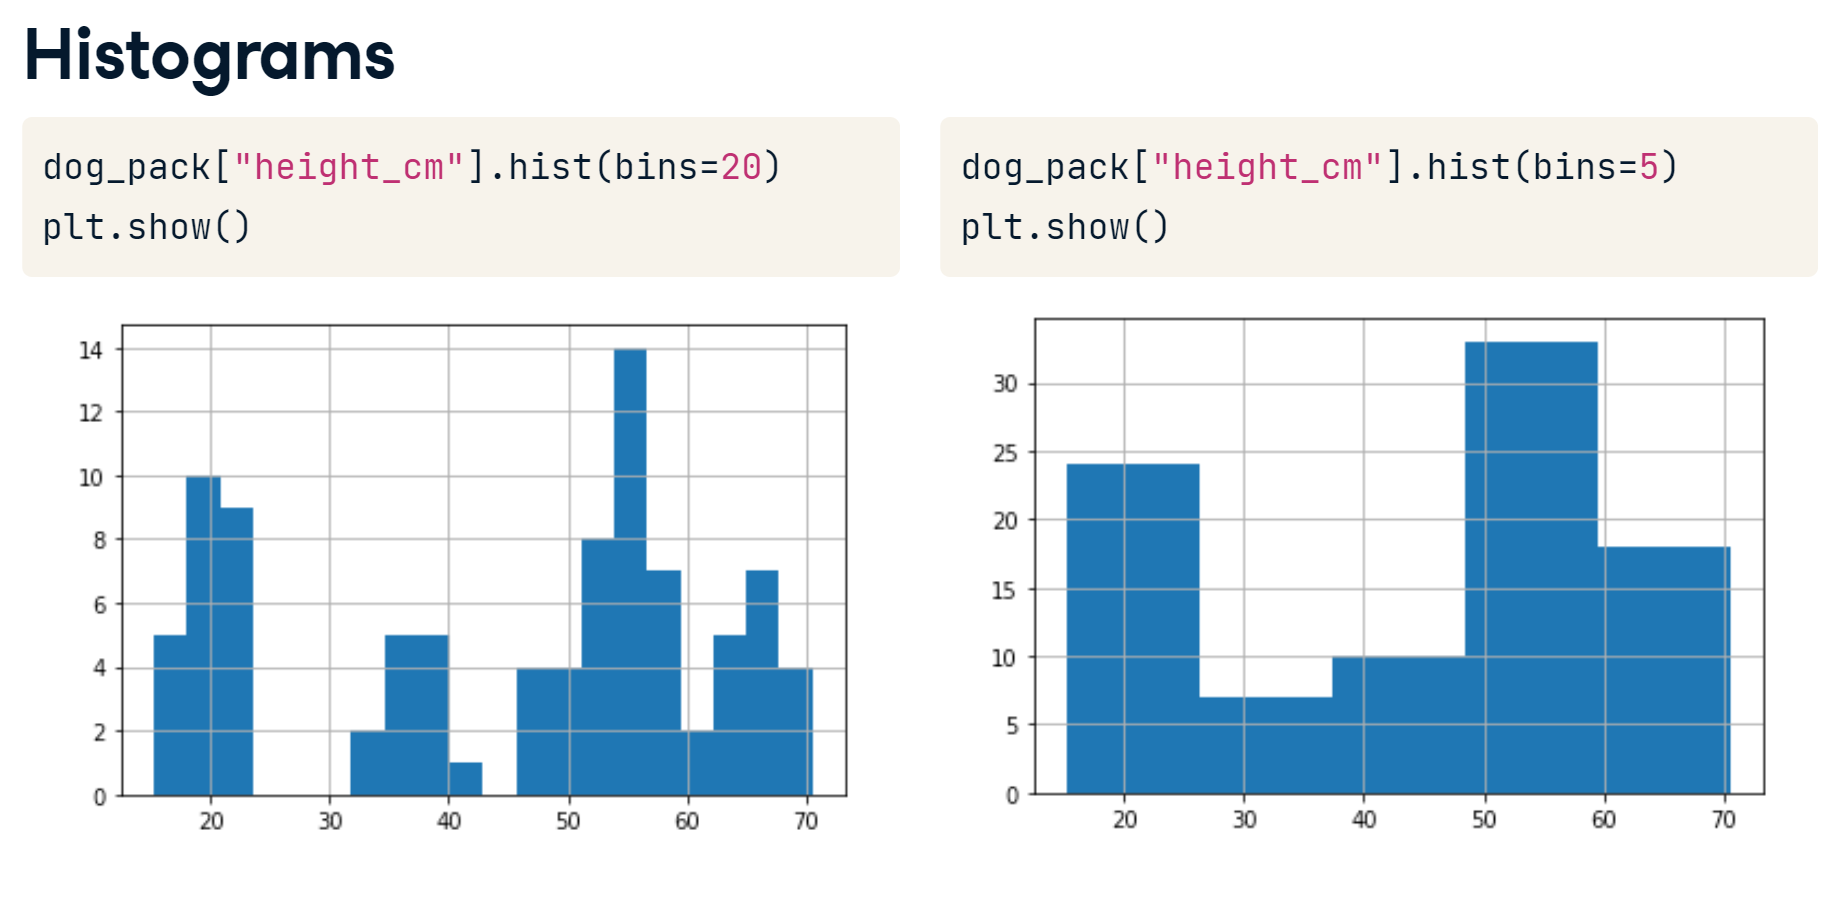

---
### Bar Plots
**When we have to use categorical values VS numeric value, we USE BAR PLOTS instead of HISTOGRAMS**

---
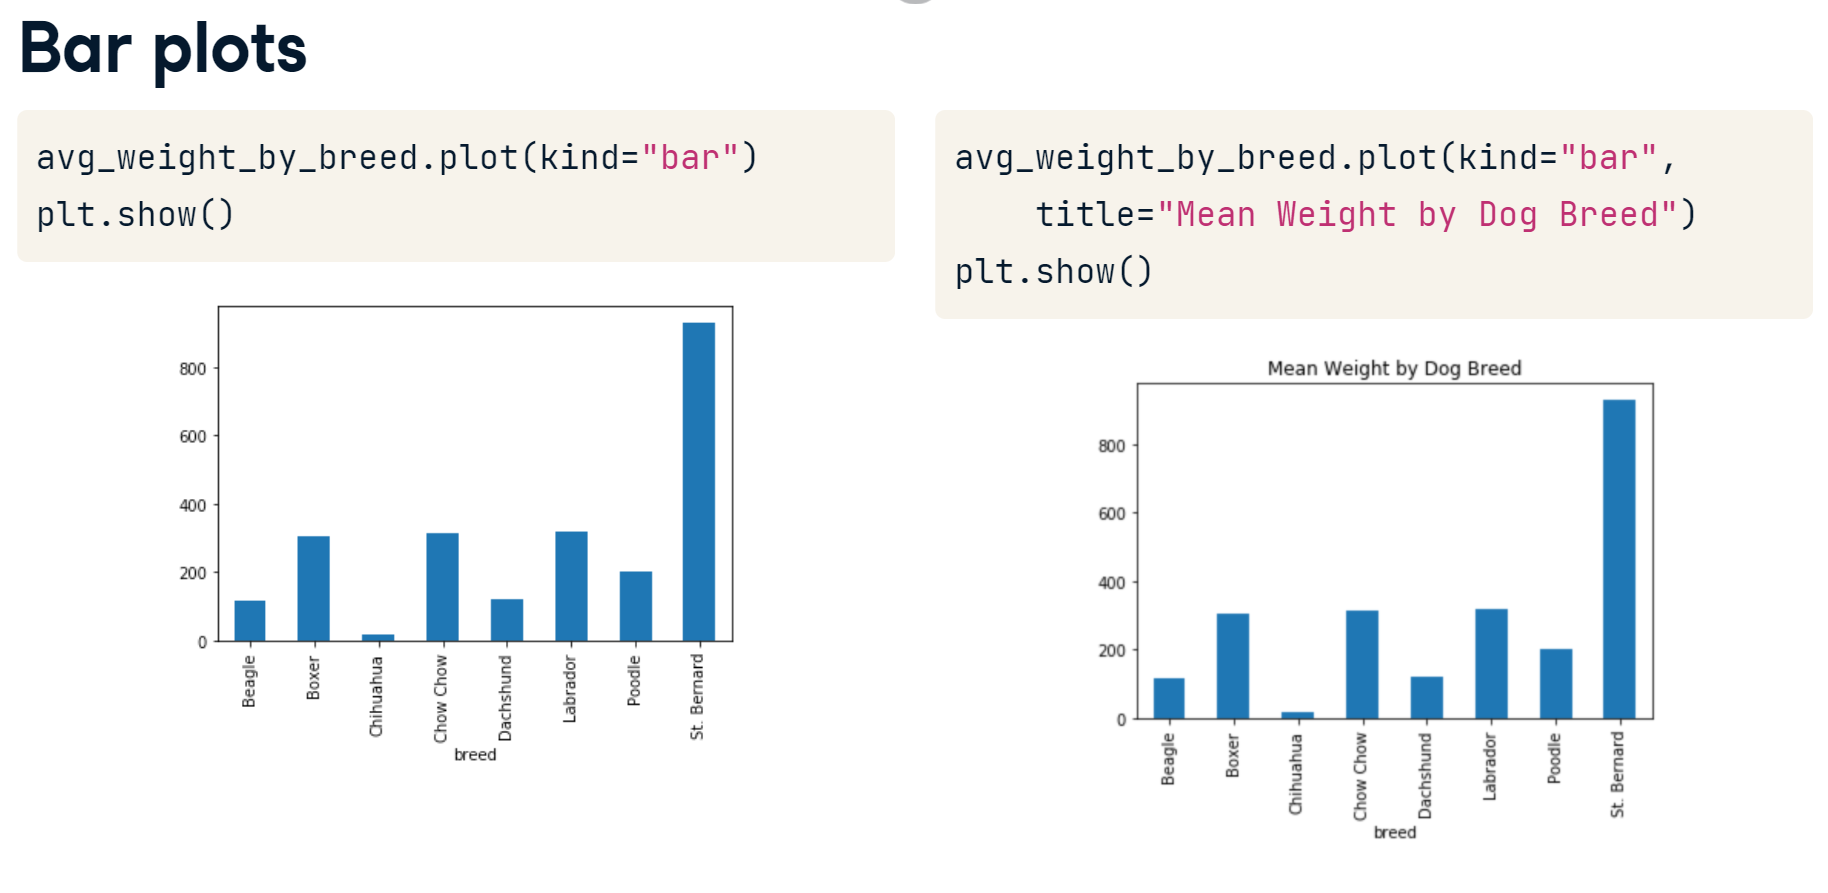

---
### Line Plots

Great for visualizing change in numeric variables over time.
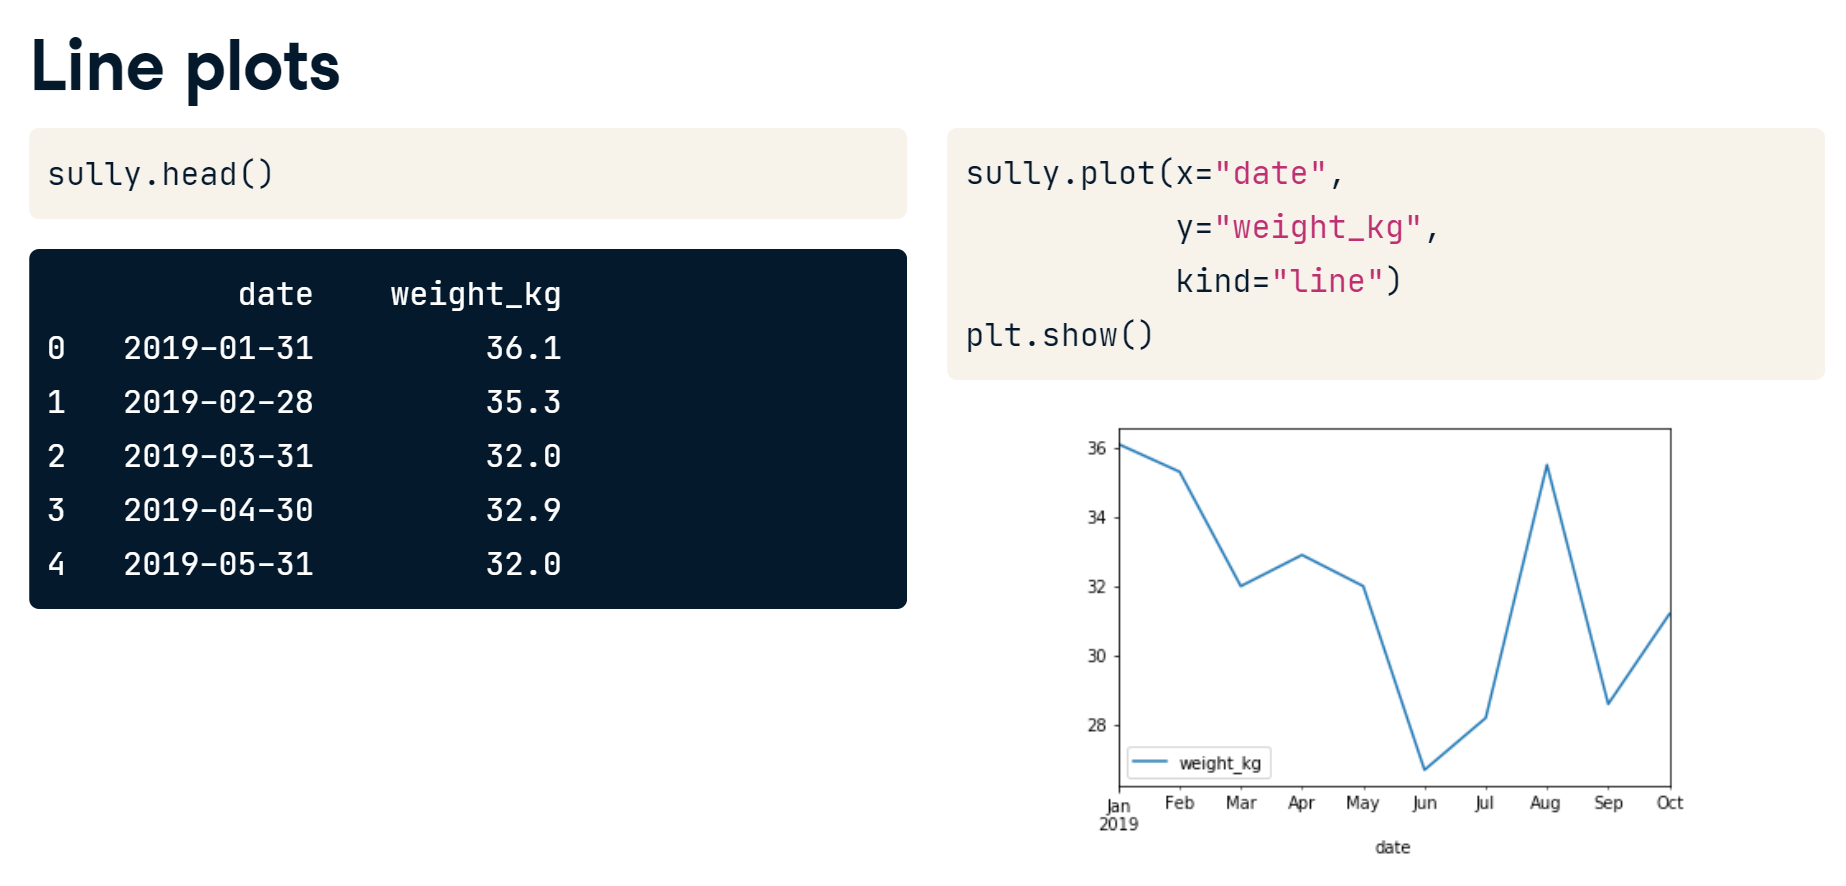

**NOTE:** We can rotate the axis labels with the parameter `rot=45`, where '45' is the number of degree by which we wanna rotate them.

---
### Scatter Plots
Great for visualizing relationship between two numeric variables.
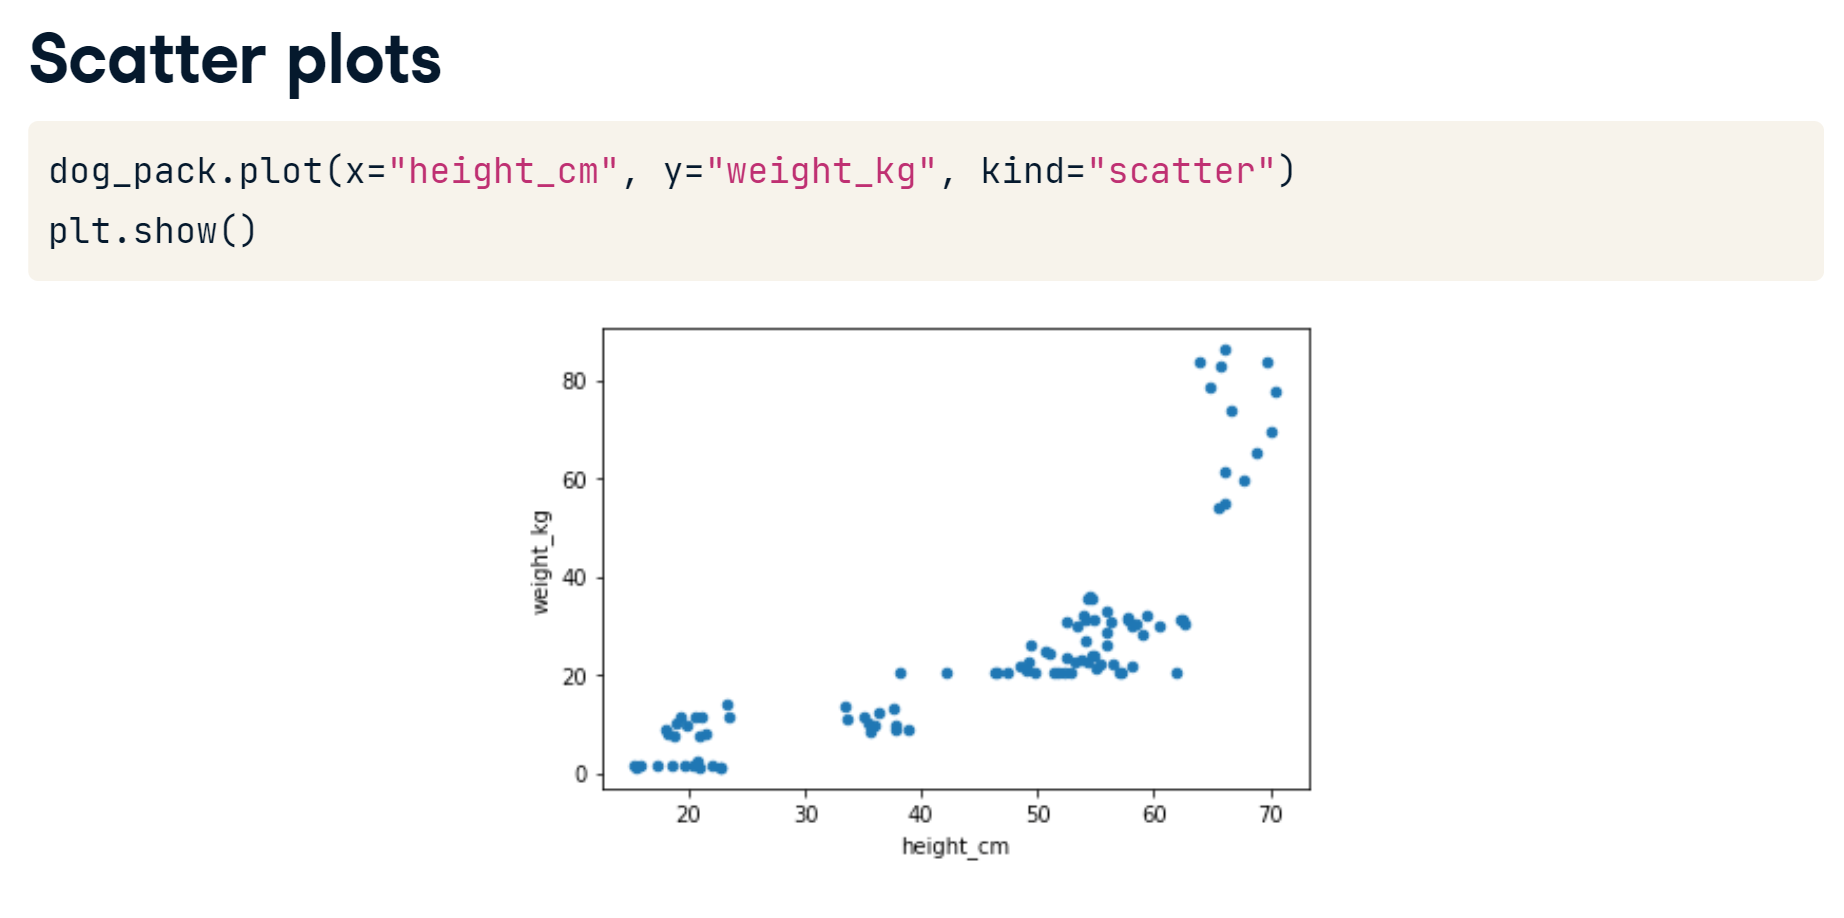

---
### Layering Plots
PLots can also be plot on top of each other
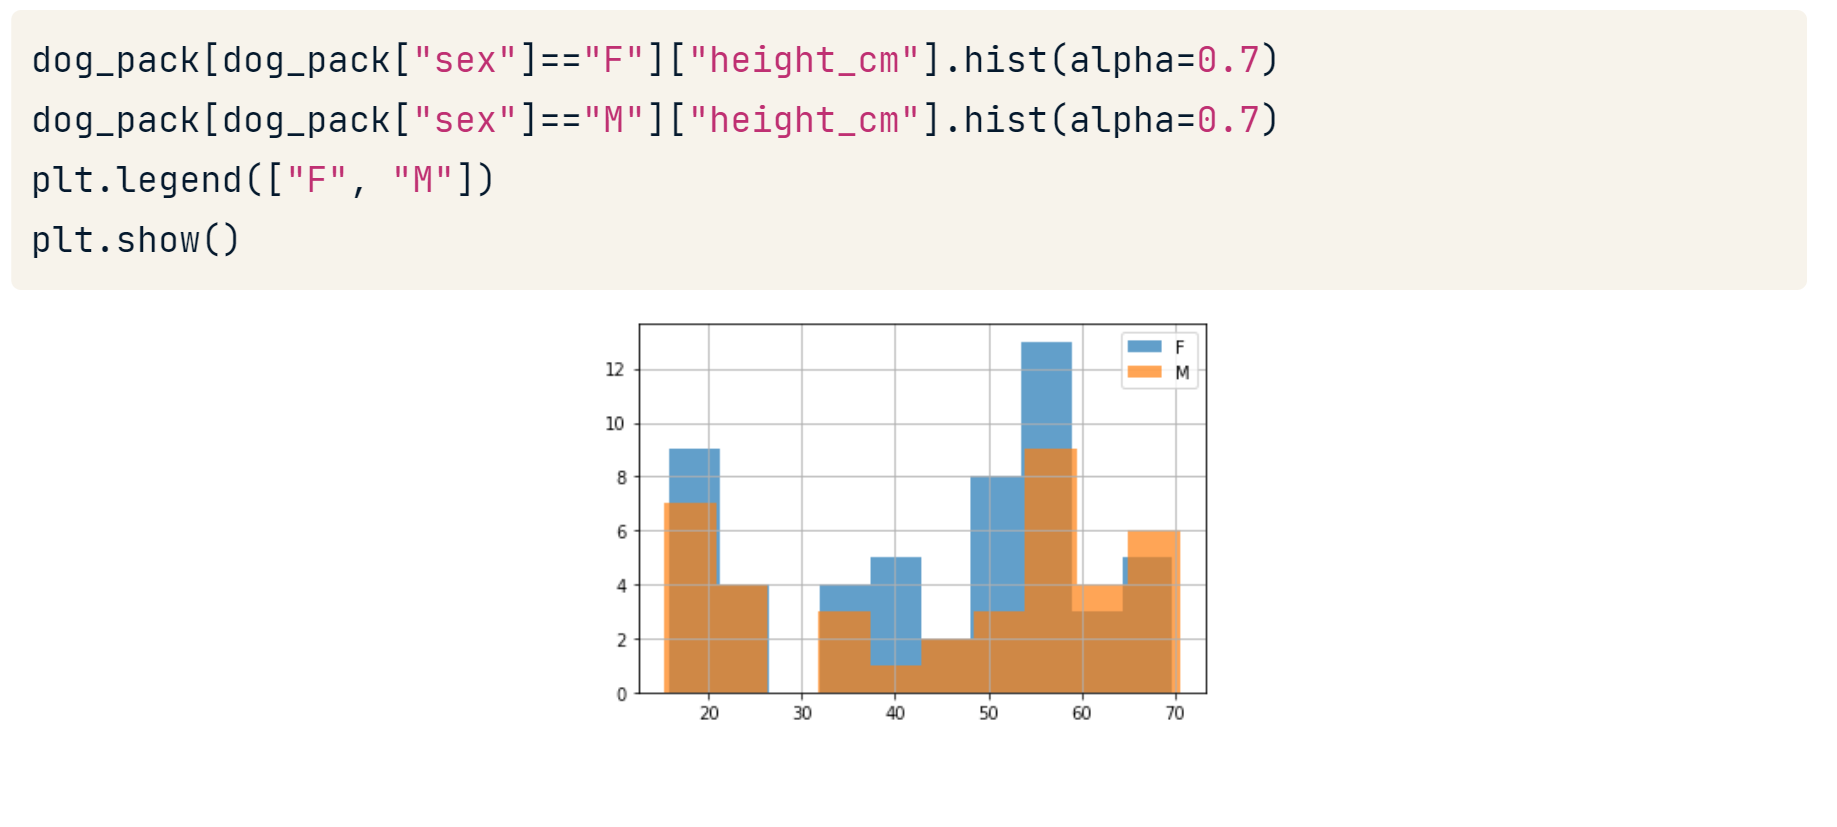

### Missing Values
In a DataFrame, missing values are indicated as NaN (Not a number), and we can use `df.isna()` to check, how many values are missing and which one. 
But It's to much data, we can use `df.isna().any()`.

To count the number of missing values, we can use: `df.isna().sum()`
To visualize this, one option is to just plot a bar graph like this:

```
    import matplotlib.pyplot as plt
    df.isna().sum().plot(kind="bar")
    plt.show()
```

#### Option 1: Remove missing values
`df.dropna()`

#### Option 2: Replace missing values
`df.fillna(0)`

There are other various mathematical techniques, that we will see in the later courses.

---
### Creating a DataFrame
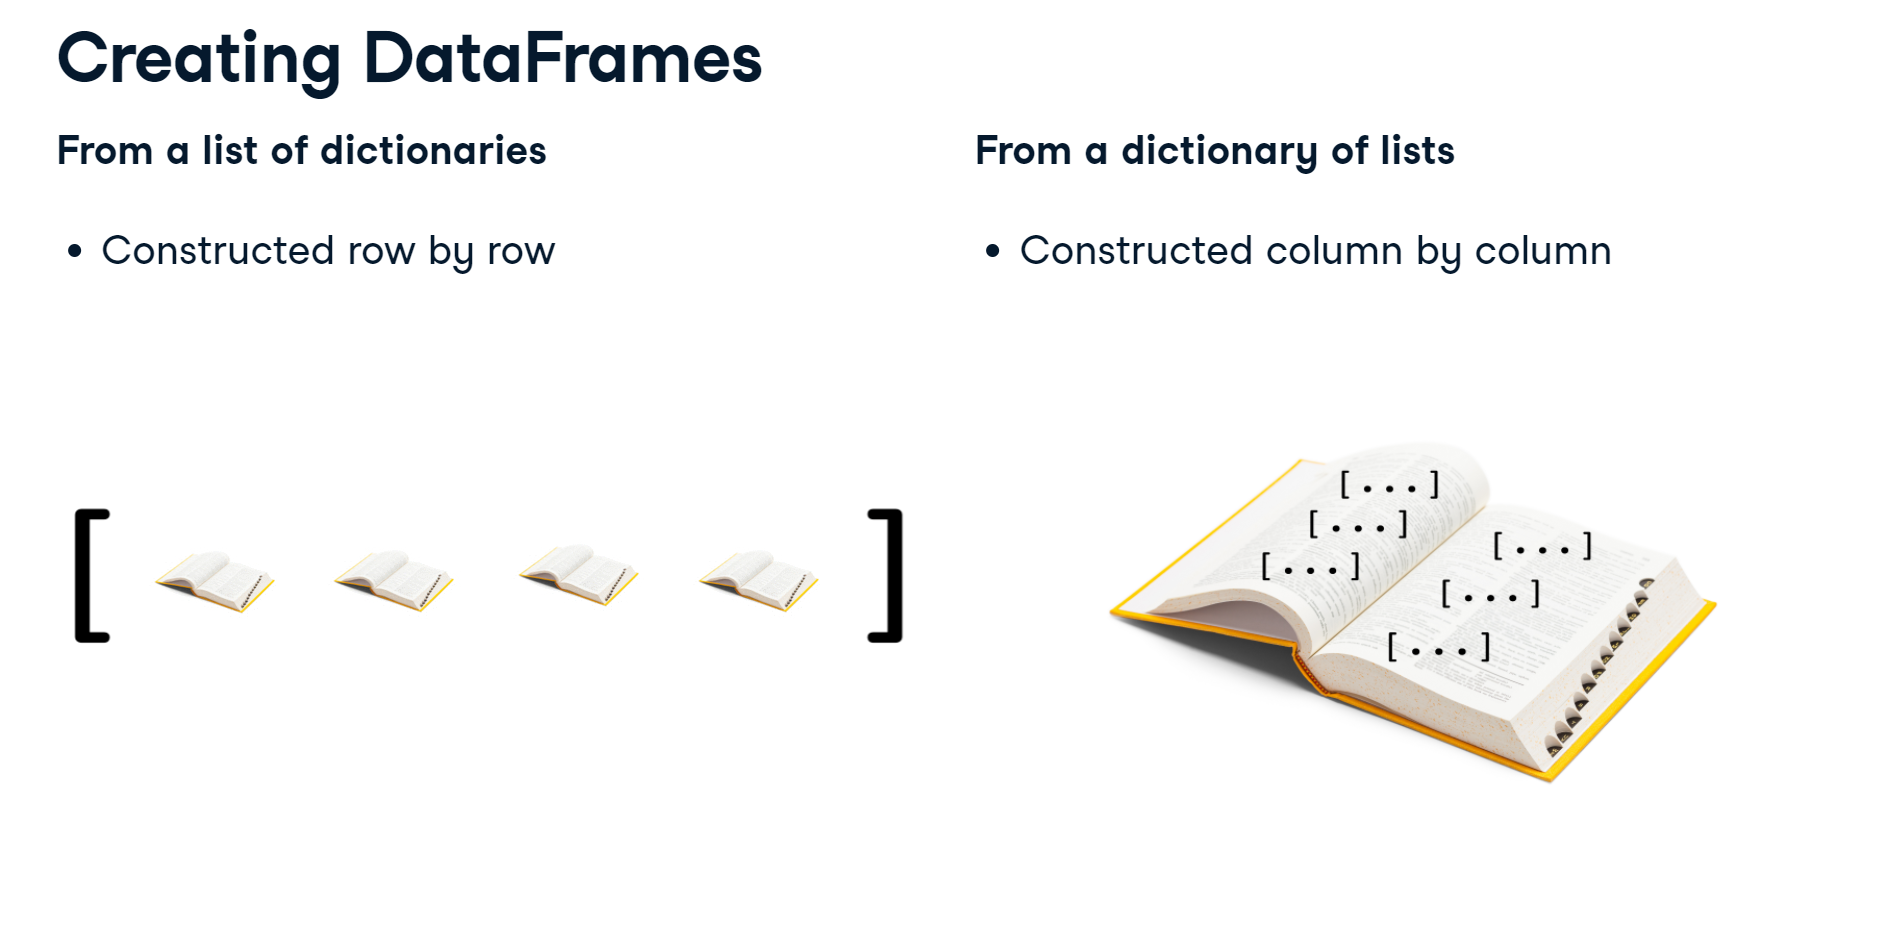
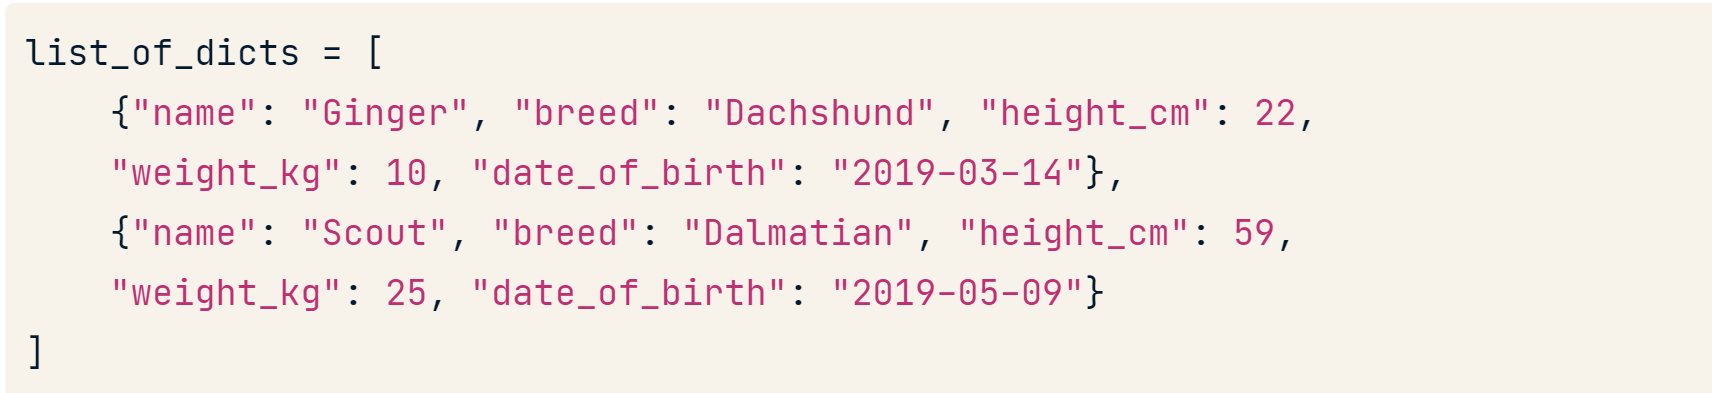
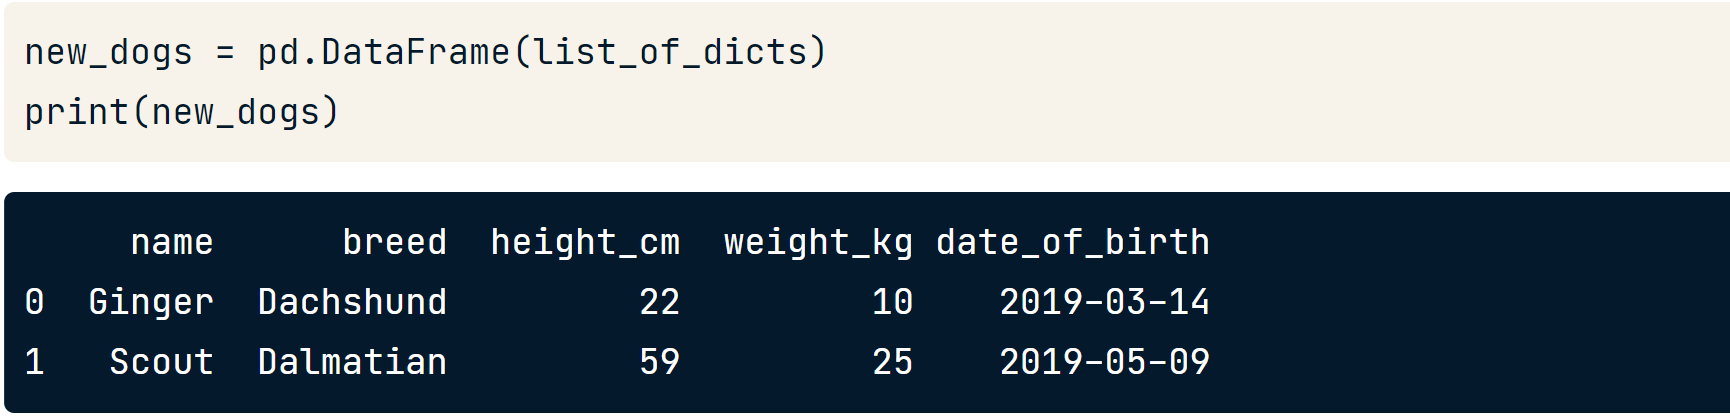

---

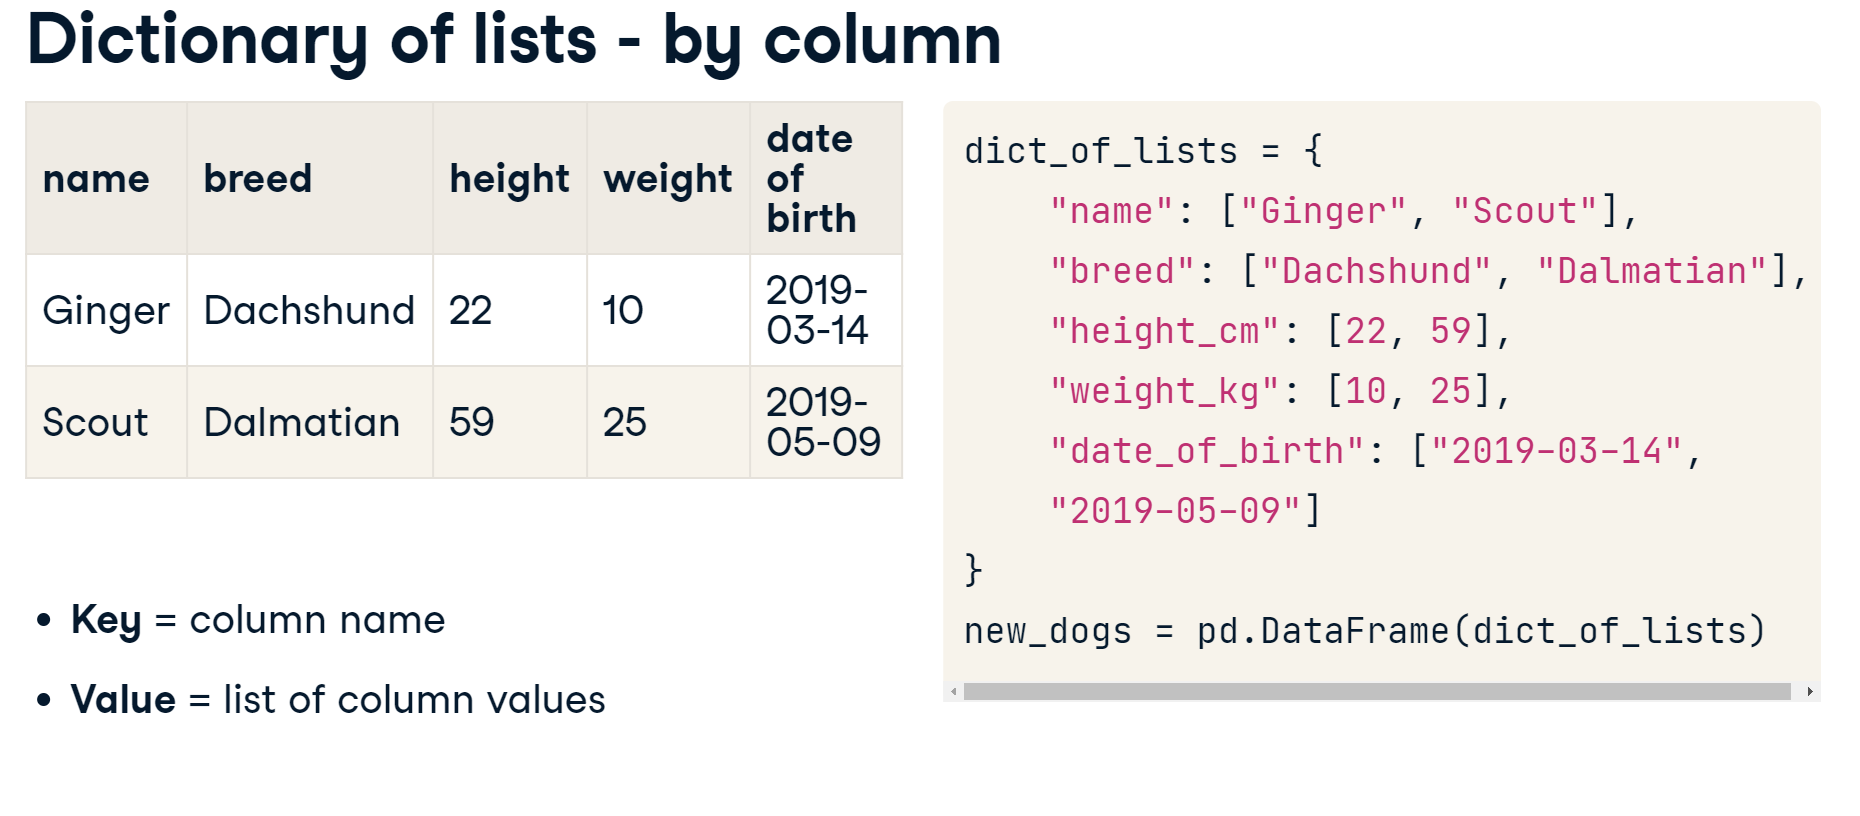
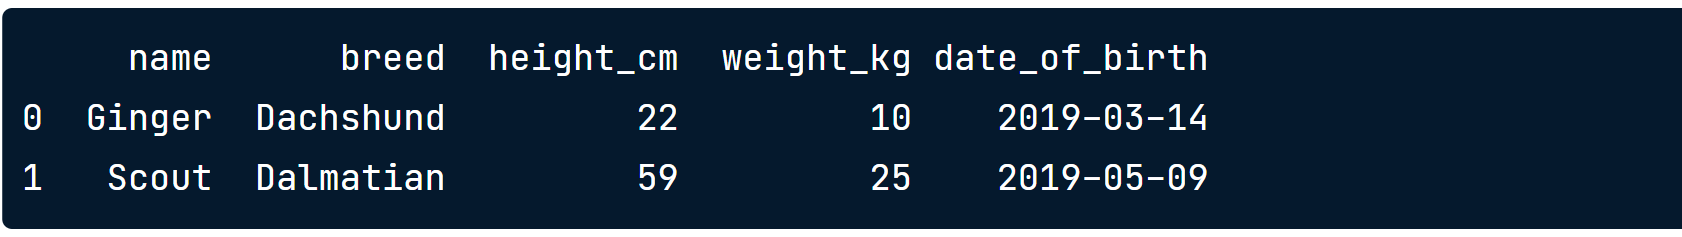